In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [94]:
seed=123
train_dir=r"D:\tesor flow\archive\test"
img_size=(64,64)
batch_size=32


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.7,1.3],
    zoom_range=0.1,
    horizontal_flip=True,
)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
    subset='training',          
    seed=seed
)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='grayscale',
    subset='validation',       
    seed=seed
)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'archive/test',
    target_size=(64,64),
    color_mode='grayscale',  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False
)

Found 7178 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [106]:
model = Sequential([
    Conv2D(36, kernel_size = (3,3), input_shape=(64,64,1)),
    BatchNormalization(),
    Activation('relu'), 
    MaxPooling2D((2,2)),
    Conv2D(72, kernel_size = (3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(144, kernel_size = (3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(288, kernel_size = (3,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

In [107]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [108]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 62, 62, 36)     │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 62, 62, 36)     │           144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 62, 62, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 31, 31, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 29, 29, 72)     │        23,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 29, 29, 72)     │           288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 29, 29, 72)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 72)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 144)    │        93,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 12, 12, 144)    │           576 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 12, 12, 144)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 144)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 4, 4, 288)      │       373,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 4, 4, 288)      │         1,152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 4, 4, 288)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 2, 2, 288)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 7)              │           23

 Total params: 831,543 (3.17 MB)

 Trainable params: 830,463 (3.17 MB)

 Non-trainable params: 1,080 (4.22 KB)

In [109]:
callbacks=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [110]:
history = model.fit(
    train_generator,
    epochs=32,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/32
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.2419 - loss: 1.8164 - val_accuracy: 0.2472 - val_loss: 1.8523
Epoch 2/32
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.2849 - loss: 1.7407 - val_accuracy: 0.2472 - val_loss: 2.0135
Epoch 3/32
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.3312 - loss: 1.6628 - val_accuracy: 0.3345 - val_loss: 1.6696
Epoch 4/32
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.3802 - loss: 1.5717 - val_accuracy: 0.2912 - val_loss: 1.7491
Epoch 5/32
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.4136 - loss: 1.5094 - val_accuracy: 0.3932 - val_loss: 1.5481
Epoch 6/32
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.4341 - loss: 1.4653 - val_accuracy: 0.4511 - val_loss: 1.3646
Epoch 7/32
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.4519 - loss: 1.4204 - val_accuracy: 0.4211 - val_loss: 1.4460
Epoch 8/32
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.4600 - loss: 1.3940 -

In [111]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6151 - loss: 0.9979
Test Accuracy: 61.51%


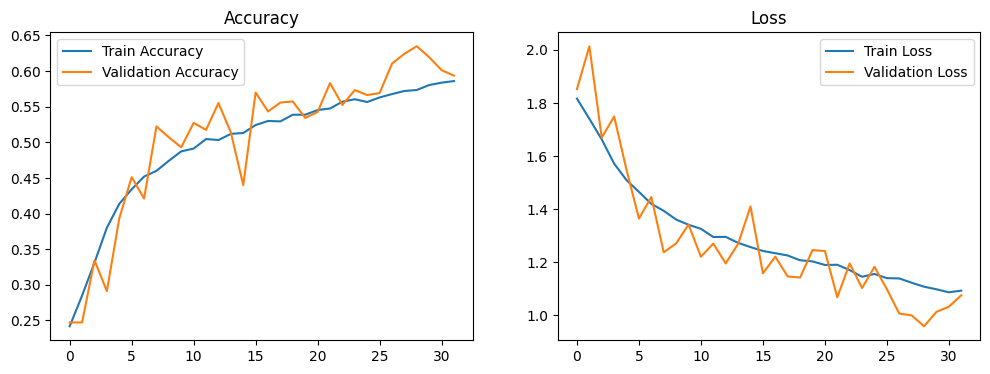

In [114]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [ ]:

model.save("my_cnn_model.keras")


In [ ]:


def predict_image(model, img_path, class_indices):
    target_size = model.input_shape[1:3]  
    img = load_img(img_path, target_size=target_size, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0) 
    pred = model.predict(img_array)  
    pred_class_idx = np.argmax(pred, axis=1)[0]
    inv_class_indices = {v: k for k, v in class_indices.items()}
    pred_label = inv_class_indices[pred_class_idx]
    confidence = np.max(pred) * 100
    return pred_label, confidence


In [ ]:
class_indices = train_generator.class_indices
img_path = r"archive\test\happy\PrivateTest_11807115.jpg"
pred_label, confidence = predict_image(model, img_path, class_indices)
print(f"Predicted Label: {pred_label}")
print(f"Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: happy
Confidence: 47.46%
